In [1]:
! pip install pandas
! pip install numpy

# Data Preprocessing

We have all heard the phrase "garbage in, garbage out", in the realm of Machine Learning, it translates to Bad Data, Bad Results.

Throughout this bootcamp we will delve into Python and play with data. We will explore several valuable libraries such as numpy, pandas, scikit et cetera. Python is widely used in ML (Machine Learning) due to it's simplicity in syntax and extensive open source libraries.

## Introduction To Python

So what is Python? A Snake? Yes, but also a programming language that encompasses well known concepts such as conditionals (if-else statements), loops (for, while), arithmethic (+,-,*,/) and more.
Throughout this course we will explain all the syntax we use, but still a basic understanding can be of use. Let's start simple...

### The Basics

#### Printing

In [2]:
print("Heya World") # Will print to console, this is a comment

Heya World


Do note that python does not use curly braces unlike most languages, it doesn't even need semicolons at the end of each statement;

Instead it solely relies on **indentation**.

#### Conditionals

In [3]:
a = 1+1 # basic arithmethic
if a == 2:
    print("Maths is real")
elif a == 1: # elif is how you write else if in python
    print("How??")
else:
    print("What??")

Maths is real


#### Loops

Loops in python are also simple.

In [4]:
for i in range(10): # loops 10 times from 0 to 9
    print(i)

###

i=0
while i<10: # Equaivalent while loop of the above for
    print(i) 
    i += 1 # Abbreviated means of addition can also use -= /= or */

0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9


#### Datatypes

All this is great, but what are the datatypes available in this langauge? 

Well, the common datatypes are integers, floats, booleans and [strings](https://www.programiz.com/python-programming/string). More complex ones would be [Lists](https://www.programiz.com/python-programming/list), [Tuples](https://www.programiz.com/python-programming/tuple) and [Dictionaries](https://www.programiz.com/python-programming/dictionary). They are all fairly simple, and you can learn more about them by checking the links provided.

#### Functions

In [5]:
def ml_function(): # How to define a function
    print("It is 2023")

ml_function() # How to call a function

It is 2023


## Python Libraries

Libraries are collections of modules, and modules are simply python code - functions, classes, constants etc. Below is a simple example of this.

In [6]:
import math

print(math.pi)

3.141592653589793


How does this work?

When we write `import math`, Python brings in all the code written under the math module into our program, and then we access math.PI which is a constant in the module. You can always learn more about any module by referring to the [documentation](https://docs.python.org/3/library/math.html?highlight=math#module-math).

The libraries that are important to us, are those that do things related to Machine Learning, initially we will see how to handle data, with the help of a library known as Pandas.

### Pandas

[Pandas Docs](https://pandas.pydata.org/docs/). The Dataset we will be using for out first foray into Pandas is the [Insurance Targets List](https://drive.google.com/file/d/1FG6-KJxEZ7j2h3_0Ee04VwzYK3KMscjG/view?usp=sharing).

In [7]:
import pandas as pd

data = pd.read_csv('data.csv')
data.head()
# data.tail()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [8]:
data.shape

(10, 4)

In [9]:
data.columns

Index(['Country', 'Age', 'Salary', 'Purchased'], dtype='object')

#### Data Indexing

Pandas offers two ways to index data:

 * `.loc` - Label Based Indexing
 * `.iloc` - Integer Based Indexing

##### `.loc`

 * loc interprets values provided as labels (strings).
 * Its often used for conditional indexing.
 * It includes last index.


In [10]:
data.loc[2:8] # Reads this as a label, since our index is numeric lookss same as iloc 

,Country,Age,Salary,Purchased
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No


In [11]:
data.loc[data['Salary']>70000] # loc allows us conditionals

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No


In [12]:
data.loc[(data['Purchased'].str.contains('No')) & ( data['Salary']>70000)] # Grouping conditionals is also possible

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
8,Germany,50.0,83000.0,No


##### `.iloc`

* In pandas we use a method iloc which stands for integer locate
* It views all input as integer indices
* in contrast to loc it doesn't include last index

In [13]:
data.iloc[2:8]

,Country,Age,Salary,Purchased
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes


In [14]:
data.iloc[2:8, 2:5]

,Salary,Purchased
2,54000.0,No
3,61000.0,No
4,NaN,Yes
5,58000.0,Yes
6,52000.0,No
7,79000.0,Yes


In [15]:
X = data.iloc[:, 1:].values
print(X)

[[44.0 72000.0 'No']
 [27.0 48000.0 'Yes']
 [30.0 54000.0 'No']
 [38.0 61000.0 'No']
 [40.0 nan 'Yes']
 [35.0 58000.0 'Yes']
 [nan 52000.0 'No']
 [48.0 79000.0 'Yes']
 [50.0 83000.0 'No']
 [37.0 67000.0 'Yes']]


## Exploring Data
Data exploration is the first step of data analysis used to explore and visualize data to uncover insights from the start or identify areas or patterns to dig into more.

### `.unique()`

Returns a list of unique values in a given Series

### `.value_counts()`

Returns a Series of count of each value in a given Series

In [16]:
import IPython.display as ipd
import numpy as np
# Loading data
data = pd.read_csv("train.csv")
data.head() # By default gives only 5 entries, Has a max limit of 50, accepts parameter upto 50
# data.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [17]:
data["Item_Type"].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [18]:
data["Item_Type"].value_counts()
# ipd.display(data["Item_Type"].count())

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

## Inconsistent Data

Checking the same for Item Fat Content:

In [19]:
data["Item_Fat_Content"].unique() 

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [20]:
data["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

To deal with missing values we could replace each manually or we could python in-built string processing library by:
1. Converting all variables to lower-case, this takes care of capitalization inconsistencies
2. Converting all alternate labels to a singular label, lf and ref to low fat and regular

In [21]:
dat_copy = data.copy() # Making a shallow copy to avoid any conversion issues
dat_copy["Item_Fat_Content"] = dat_copy["Item_Fat_Content"].str.lower()
ipd.display(dat_copy["Item_Fat_Content"].unique())


# dat_copy["Item_Fat_Content"] = dat_copy["Item_Fat_Content"].replace("lf","low fat")
dat_copy["Item_Fat_Content"] = dat_copy["Item_Fat_Content"].replace({"lf":"low fat", "reg": "regular"})
dat_copy["Item_Fat_Content"].unique()

# dat_copy["Item_Fat_Content"].value_counts()

array(['low fat', 'regular', 'lf', 'reg'], dtype=object)

array(['low fat', 'regular'], dtype=object)

In [22]:
data = dat_copy
data.head(15)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,low fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,low fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


## Missing Values
Missing values in datasets are often represented by `NaN` or `None`. It usually requires to cleaned before being fed into a model.
But before we get into missing values, here's a small revision:

1. The mean is the average of a data set.
2. The mode is the most common number in a data set.
3. The median is the middle of the set of numbers.

[![03.gif](https://i.postimg.cc/3Nv2XQRP/03.gif)](https://postimg.cc/QKjBDPcb)


**How to deal with missing data?**

1.  Drop data  
    a. Drop the whole row  
    b. Drop the whole column
    
2.  Replace data  
    a. Replace it by mean  
    b. Replace it by frequency  
    c. Replace it based on other functions

In [23]:
data["Outlet_Size"].unique() 

array(['Medium', nan, 'High', 'Small'], dtype=object)

Missing data can also be found by `isnull()` or `isna()` functions.

In [24]:
ipd.display(data.isnull().any())

Item_Identifier              False
Item_Weight                   True
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

We can figure which of our rows are missing their `Item Weights` by the following:

In [25]:
data[data['Item_Weight'].isnull()] #1462 columns

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,low fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,low fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,low fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,low fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,low fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,low fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


**As `Item_Weight` is a Ratio (continious) variable we replace it by it's `Mean`**

In [26]:
# Replace Outlet by mode
# Replace Item_weight by mean

avg_item_wt = data["Item_Weight"].astype("float").mean()

data_cpy = data.copy()
data_cpy["Item_Weight"].replace(np.nan, avg_item_wt, inplace=True)
data_cpy["Item_Weight"].isnull().any() 
#Maybe assert

False

**As `Outlet_size` is an ordinal variable we replace it by it's `Mode`**

In [27]:
data_cpy = data.copy()

ipd.display(data_cpy["Outlet_Size"].value_counts())
outlet_mode = data_cpy["Outlet_Size"].mode()
data_cpy["Outlet_Size"].replace(np.nan, outlet_mode[0], inplace=True)

data_cpy["Outlet_Size"].isnull().any()
# data_cpy["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

False

In [28]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,low fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [29]:
data = data_cpy
ipd.display(data.isnull().any())

Item_Identifier              False
Item_Weight                   True
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                  False
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

## Normalization

Normalization is a data preparation technique that is frequently used in machine learning. The process of transforming the columns in a dataset to the same scale is referred to as normalization. Every dataset does not need to be normalized for machine learning. It is only required when the ranges of characteristics are different.
(We will learn more in coming sessions)

# Dealing with Outliers

Sometimes outliers can mess up an analysis; you usually don't want a handful of data points to skew the overall results. Let's revisit our example of income data, with some random billionaire thrown in:

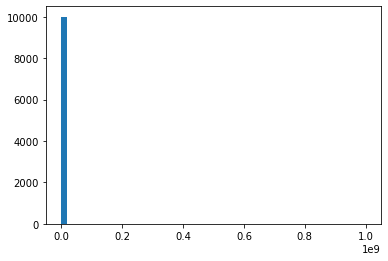

In [30]:
%matplotlib inline
import numpy as np

incomes = np.random.normal(27000, 15000, 10000)
incomes = np.append(incomes, [1000000000])

import matplotlib.pyplot as plt
plt.hist(incomes, 50)
plt.show()

That's not very helpful to look at. One billionaire ended up squeezing everybody else into a single line in my histogram. Plus it skewed my mean income significantly:

In [31]:
incomes.mean()

127165.41088932681

It's important to dig into what is causing your outliers, and understand where they are coming from. You also need to think about whether removing them is a valid thing to do, given the spirit of what it is you're trying to analyze. If I know I want to understand more about the incomes of "typical Americans", filtering out billionaires seems like a legitimate thing to do.

Here's something a little more robust than filtering out billionaires - it filters out anything beyond two standard deviations of the median value in the data set:

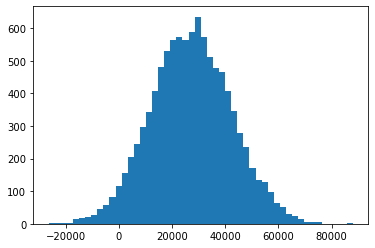

In [32]:
def reject_outliers(data):
    u = np.median(data)
    s = np.std(data)
    filtered = [e for e in data if (u - 2 * s < e < u + 2 * s)]
    return filtered

filtered = reject_outliers(incomes)

plt.hist(filtered, 50)
plt.show()

That looks better. And, our mean is more, well, meangingful now as well:

In [33]:
np.mean(filtered)

27178.12743041575

## Activity

Instead of a single outlier, add several randomly-generated outliers to the data. Experiment with different values of the multiple of the standard deviation to identify outliers, and see what effect it has on the final results.

# MatPlotLib Basics

## Draw a line graph

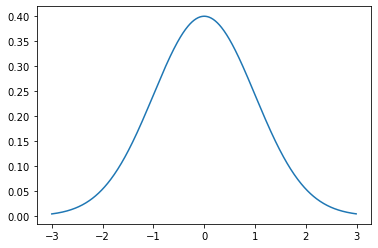

In [34]:
%matplotlib inline
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-3, 3, 0.01)

plt.plot(x, norm.pdf(x))
plt.show()

## Mutiple Plots on One Graph

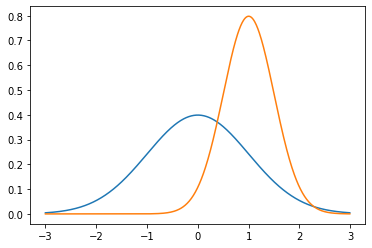

In [35]:
plt.plot(x, norm.pdf(x))
plt.plot(x, norm.pdf(x, 1.0, 0.5))
plt.show()

## Save it to a File

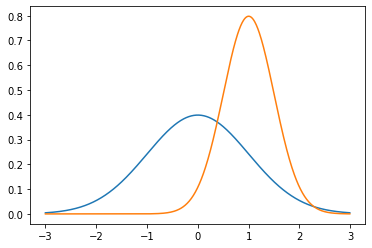

In [36]:
plt.plot(x, norm.pdf(x))
plt.plot(x, norm.pdf(x, 1.0, 0.5))
plt.savefig('MyPlot.png', format='png')

## Adjust the Axes

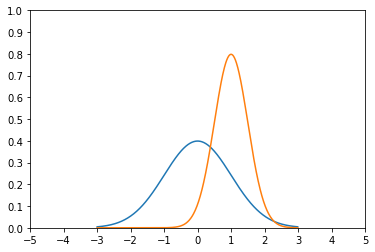

In [37]:
axes = plt.axes()
axes.set_xlim([-5, 5])
axes.set_ylim([0, 1.0])
axes.set_xticks([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5])
axes.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.plot(x, norm.pdf(x))
plt.plot(x, norm.pdf(x, 1.0, 0.5))
plt.show()

## Add a Grid

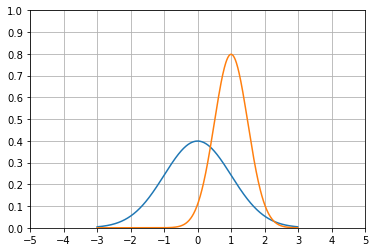

In [38]:
axes = plt.axes()
axes.set_xlim([-5, 5])
axes.set_ylim([0, 1.0])
axes.set_xticks([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5])
axes.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
axes.grid()
plt.plot(x, norm.pdf(x))
plt.plot(x, norm.pdf(x, 1.0, 0.5))
plt.show()

## Change Line Types and Colors

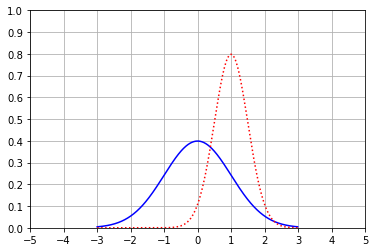

In [39]:
axes = plt.axes()
axes.set_xlim([-5, 5])
axes.set_ylim([0, 1.0])
axes.set_xticks([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5])
axes.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
axes.grid()
plt.plot(x, norm.pdf(x), 'b-')
plt.plot(x, norm.pdf(x, 1.0, 0.5), 'r:')
plt.show()

## Labeling Axes and Adding a Legend

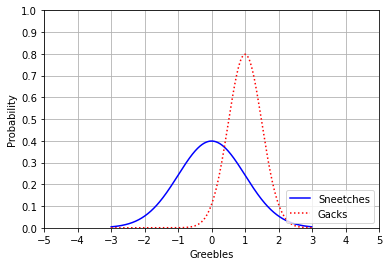

In [40]:
axes = plt.axes()
axes.set_xlim([-5, 5])
axes.set_ylim([0, 1.0])
axes.set_xticks([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5])
axes.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
axes.grid()
plt.xlabel('Greebles')
plt.ylabel('Probability')
plt.plot(x, norm.pdf(x), 'b-')
plt.plot(x, norm.pdf(x, 1.0, 0.5), 'r:')
plt.legend(['Sneetches', 'Gacks'], loc=4)
plt.show()

## XKCD Style :)

Text(0, 0.5, 'my overall health')

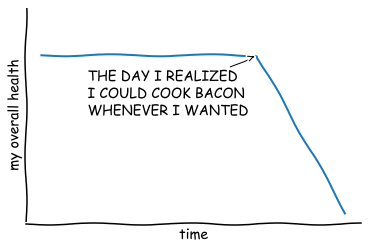

In [41]:
plt.xkcd()

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.xticks([])
plt.yticks([])
ax.set_ylim([-30, 10])

data = np.ones(100)
data[70:] -= np.arange(30)

plt.annotate(
    'THE DAY I REALIZED\nI COULD COOK BACON\nWHENEVER I WANTED',
    xy=(70, 1), arrowprops=dict(arrowstyle='->'), xytext=(15, -10))

plt.plot(data)

plt.xlabel('time')
plt.ylabel('my overall health')

## Pie Chart

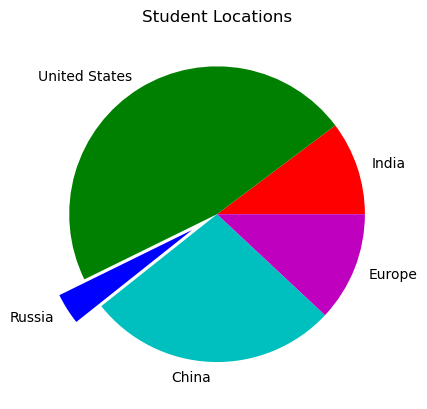

In [42]:
# Remove XKCD mode:
plt.rcdefaults()

values = [12, 55, 4, 32, 14]
colors = ['r', 'g', 'b', 'c', 'm']
explode = [0, 0, 0.2, 0, 0]
labels = ['India', 'United States', 'Russia', 'China', 'Europe']
plt.pie(values, colors= colors, labels=labels, explode = explode)
plt.title('Student Locations')
plt.show()

## Bar Chart

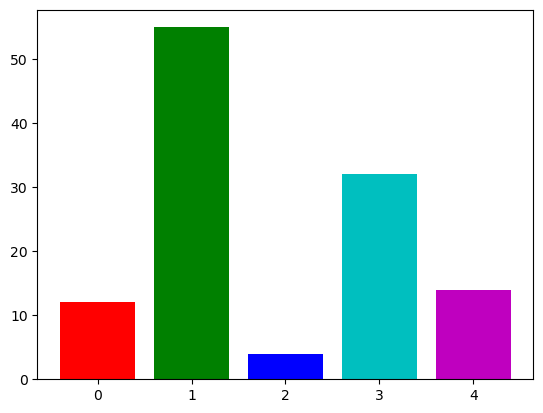

In [43]:
values = [12, 55, 4, 32, 14]
colors = ['r', 'g', 'b', 'c', 'm']
plt.bar(range(0,5), values, color= colors)
plt.show()

## Scatter Plot

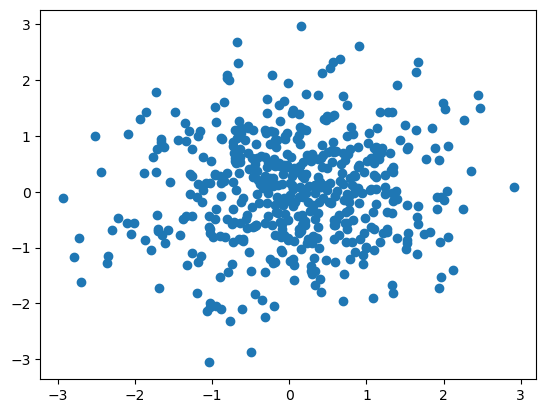

In [44]:
from pylab import randn

X = randn(500)
Y = randn(500)
plt.scatter(X,Y)
plt.show()

## Histogram

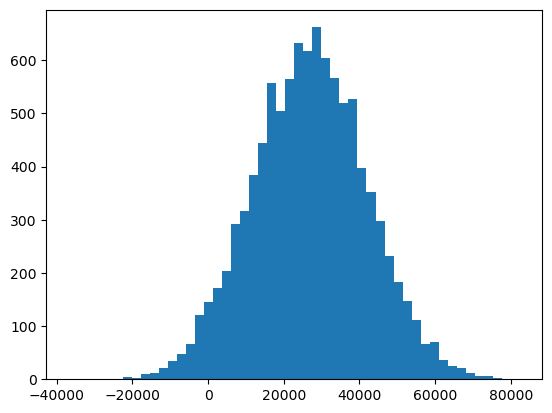

In [45]:
incomes = np.random.normal(27000, 15000, 10000)
plt.hist(incomes, 50)
plt.show()

## Box & Whisker Plot

Useful for visualizing the spread & skew of data.

The red line represents the median of the data, and the box represents the bounds of the 1st and 3rd quartiles.

So, half of the data exists within the box.

The dotted-line "whiskers" indicate the range of the data - except for outliers, which are plotted outside the whiskers. Outliers are 1.5X or more the interquartile range.

This example below creates uniformly distributed random numbers between -40 and 60, plus a few outliers above 100 and below -100:

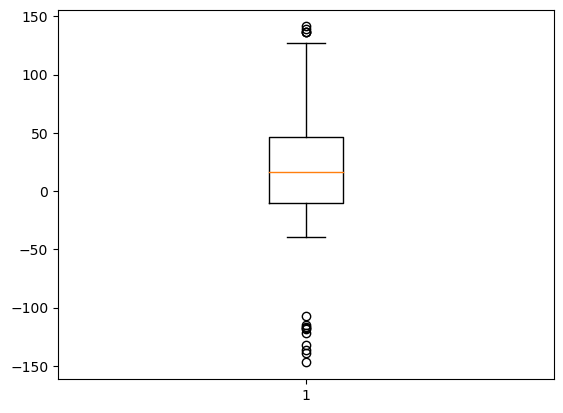

In [46]:
uniformSkewed = np.random.rand(100) * 100 - 40
high_outliers = np.random.rand(10) * 50 + 100
low_outliers = np.random.rand(10) * -50 - 100
data = np.concatenate((uniformSkewed, high_outliers, low_outliers))
plt.boxplot(data)
plt.show()

## Activity

Try creating a scatter plot representing random data on age vs. time spent watching TV. Label the axes.

# Seaborn

Seaborn is a visualization library that sits on top of matplotlib, making it nicer to look at and adding some extra capabilities too.

Let's start by loading up a real dataset on 2019 model-year vehicles, and plotting a histogram just using matplotlib to see the distribution by number of gears.

<AxesSubplot:>

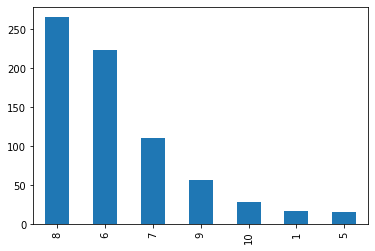

In [47]:
%matplotlib inline

import pandas as pd

df = pd.read_csv("http://media.sundog-soft.com/SelfDriving/FuelEfficiency.csv")

gear_counts = df['# Gears'].value_counts()

gear_counts.plot(kind='bar')

We can load up Seaborn, and just call set() on it to change matplotlib's default settings to something more visually pleasing.

In [48]:
import seaborn as sns
sns.set()

Now if we do the same plot command, it's a little more modern looking. Matplotlib is based on Matplot, and its visualization defaults are frankly showing their age.

<AxesSubplot:>

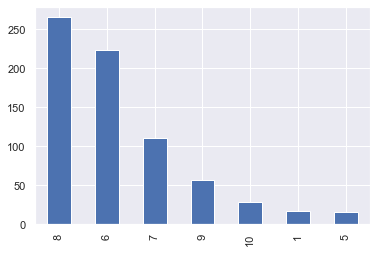

In [49]:
gear_counts.plot(kind='bar')

Let's take a closer look at the data we're dealing with.

In [50]:
df.head()

,Mfr Name,Carline,Eng Displ,Cylinders,Transmission,CityMPG,HwyMPG,CombMPG,# Gears
0,aston martin,Vantage V8,4.0,8,Auto(S8),18,25,21,8
1,Volkswagen Group of,Chiron,8.0,16,Auto(AM-S7),9,14,11,7
2,General Motors,CORVETTE,6.2,8,Auto(S8),12,20,15,8
3,General Motors,CORVETTE,6.2,8,Auto(S8),15,25,18,8
4,General Motors,CORVETTE,6.2,8,Auto(S8),14,23,17,8


Seaborn includes many types of plots that matplotlib doens't offer. For example, "distplot" can be used to plot a histogram together with a smooth distribution of that histogram overlaid on it. Let's plot the distribution of MPG values on the vehicles in this database as an example:

C:\Users\jhaas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CombMPG', ylabel='Density'>

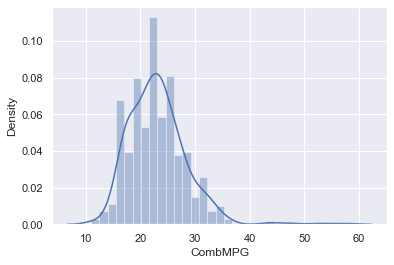

In [51]:
sns.distplot(df['CombMPG'])

Something you encounter pretty often is a "pair plot" from Seaborn. This lets you visualize plots of every combination of various attributes together, so you can look for interesting patterns between features.

As an example, let's classify cars by how many cylinders are in their engines, and look for relationships between cylinders, city MPG rating, Highway MPG rating, and combined MPG rating.

In [52]:
df2 = df[['Cylinders', 'CityMPG', 'HwyMPG', 'CombMPG']]
df2.head()

,Cylinders,CityMPG,HwyMPG,CombMPG
0,8,18,25,21
1,16,9,14,11
2,8,12,20,15
3,8,15,25,18
4,8,14,23,17


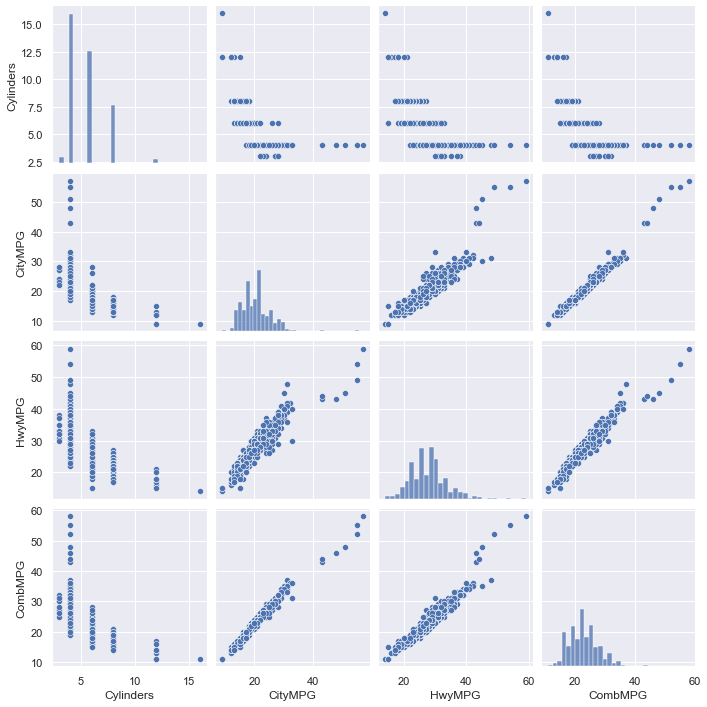

In [53]:
sns.pairplot(df2, height=2.5);  #Seaborn currently has a bug with the hue parameter so we've omitted it

By studying the results above, you can see there is a relationship between number of cylinders and MPG, but MPG for 4-cylinder vehicles ranges really widely. There also appears to be a good linear relationship between the different ways of measuring MPG values, until you get into the higher MPG ratings.

Seaborn 1.9 also includes "scatterplot", which is exactly what it sounds like. It plots individual data points across two axes of your choosing, so you can see how your data is distributed across those dimensions.

<AxesSubplot:xlabel='Eng Displ', ylabel='CombMPG'>

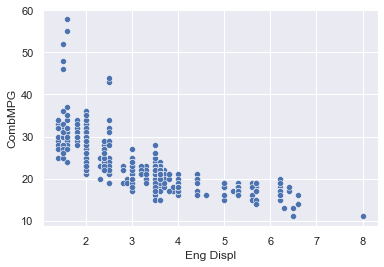

In [54]:
sns.scatterplot(x="Eng Displ", y="CombMPG", data=df)

Seaborn also offers a "jointplot", which combines a scatterplot with histograms on both axes. This lets you visualize both the individual data points and the distribution across both dimensions at the same time. 

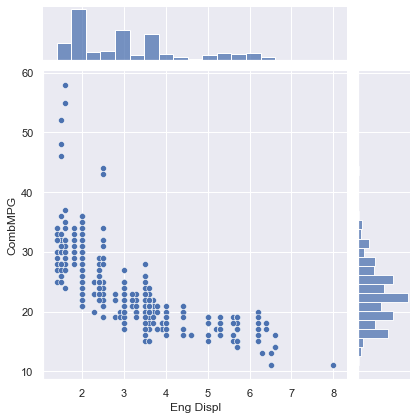

In [55]:
sns.jointplot(x="Eng Displ", y="CombMPG", data=df)

The "lmplot" is a scatterplot, but with a linear regression line computed and overlaid onto the data.

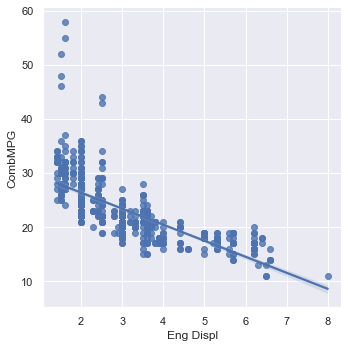

In [56]:
sns.lmplot(x="Eng Displ", y="CombMPG", data=df)

Next, let's look at a "box plot." This is what's called a "box and whiskers" plot, which is useful for visualizing typical values for a given category without getting distracted by outliers. Each box represents the range between the first and third quartiles of the data, with a line representing the median value. The "whiskers" that extend from the box represent the spread of the remainder of the data, apart from clear outliers that are plotted as individual points outside of the whiskers.

As an example, let's look at box plots for each vehicle manufacturer, visualizing the miles-per-gallon ratings across the vehicles they produce. This lets us look at the spread of MPG ratings across all the vehicles each manufacturer offers.

There are a lot of manufacturers, so to make the resulting graph readable we'll increase Seaborn's default figure size, and also use set_xticklabels to rotate the labels 45 degrees.

[Text(0, 0, 'aston martin'),
 Text(1, 0, 'Volkswagen Group of'),
 Text(2, 0, 'General Motors'),
 Text(3, 0, 'Ferrari'),
 Text(4, 0, 'FCA US LLC'),
 Text(5, 0, 'Jaguar Land Rover L'),
 Text(6, 0, 'MAZDA'),
 Text(7, 0, 'Nissan'),
 Text(8, 0, 'Porsche'),
 Text(9, 0, 'BMW'),
 Text(10, 0, 'Subaru'),
 Text(11, 0, 'Toyota'),
 Text(12, 0, 'Ford Motor Company'),
 Text(13, 0, 'Mercedes-Benz'),
 Text(14, 0, 'Honda'),
 Text(15, 0, 'Hyundai'),
 Text(16, 0, 'Rolls-Royce'),
 Text(17, 0, 'Volvo'),
 Text(18, 0, 'Kia'),
 Text(19, 0, 'Maserati'),
 Text(20, 0, 'Mitsubishi Motors Co')]

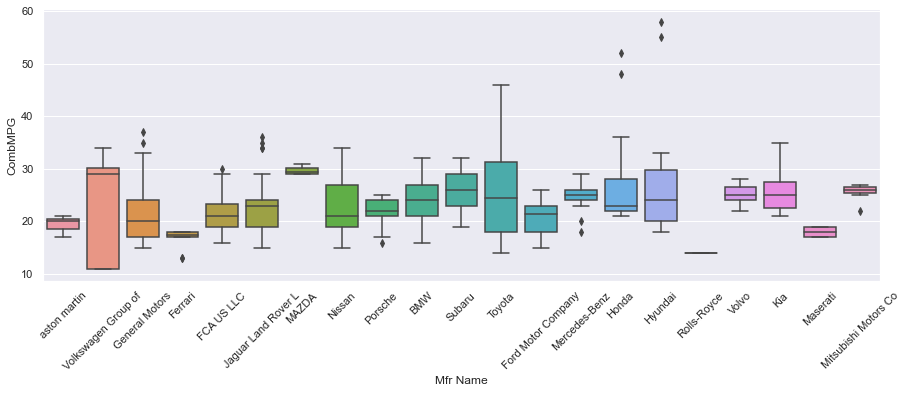

In [57]:
sns.set(rc={'figure.figsize':(15,5)})
ax=sns.boxplot(x='Mfr Name', y='CombMPG', data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

Another way to visualize the same data is the "swarm plot." Instead of boxes and whiskers, it plots each individual data point - but does so in such way that groups them together based on their distribution. It makes more sense when you look at it:

C:\Users\jhaas\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 31.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jhaas\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jhaas\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 30.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jhaas\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 29.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


[Text(0, 0, 'aston martin'),
 Text(1, 0, 'Volkswagen Group of'),
 Text(2, 0, 'General Motors'),
 Text(3, 0, 'Ferrari'),
 Text(4, 0, 'FCA US LLC'),
 Text(5, 0, 'Jaguar Land Rover L'),
 Text(6, 0, 'MAZDA'),
 Text(7, 0, 'Nissan'),
 Text(8, 0, 'Porsche'),
 Text(9, 0, 'BMW'),
 Text(10, 0, 'Subaru'),
 Text(11, 0, 'Toyota'),
 Text(12, 0, 'Ford Motor Company'),
 Text(13, 0, 'Mercedes-Benz'),
 Text(14, 0, 'Honda'),
 Text(15, 0, 'Hyundai'),
 Text(16, 0, 'Rolls-Royce'),
 Text(17, 0, 'Volvo'),
 Text(18, 0, 'Kia'),
 Text(19, 0, 'Maserati'),
 Text(20, 0, 'Mitsubishi Motors Co')]

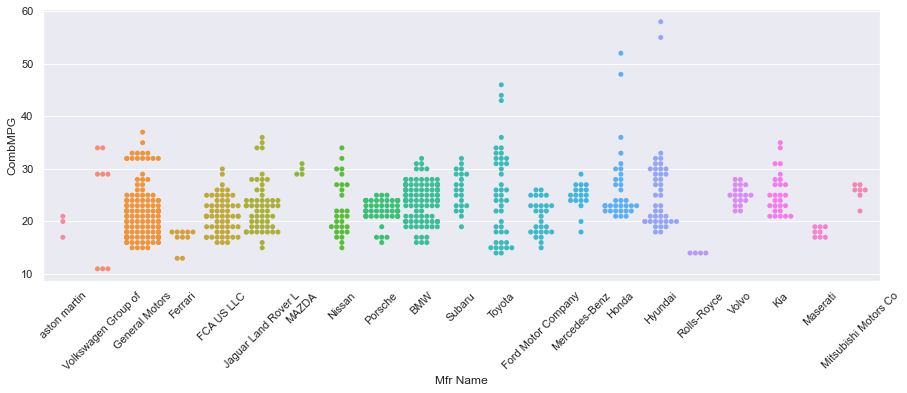

In [58]:
ax=sns.swarmplot(x='Mfr Name', y='CombMPG', data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

Another tool is the "count plot." This is basically the same thing as a histogram, but for categorical data. It lets you count up how many times each given category on the X axis occurs in your data, and plot it. So for example, we can see that General Motors offers more vehicle models than anyone else, with BMW not far behind.

[Text(0, 0, 'aston martin'),
 Text(1, 0, 'Volkswagen Group of'),
 Text(2, 0, 'General Motors'),
 Text(3, 0, 'Ferrari'),
 Text(4, 0, 'FCA US LLC'),
 Text(5, 0, 'Jaguar Land Rover L'),
 Text(6, 0, 'MAZDA'),
 Text(7, 0, 'Nissan'),
 Text(8, 0, 'Porsche'),
 Text(9, 0, 'BMW'),
 Text(10, 0, 'Subaru'),
 Text(11, 0, 'Toyota'),
 Text(12, 0, 'Ford Motor Company'),
 Text(13, 0, 'Mercedes-Benz'),
 Text(14, 0, 'Honda'),
 Text(15, 0, 'Hyundai'),
 Text(16, 0, 'Rolls-Royce'),
 Text(17, 0, 'Volvo'),
 Text(18, 0, 'Kia'),
 Text(19, 0, 'Maserati'),
 Text(20, 0, 'Mitsubishi Motors Co')]

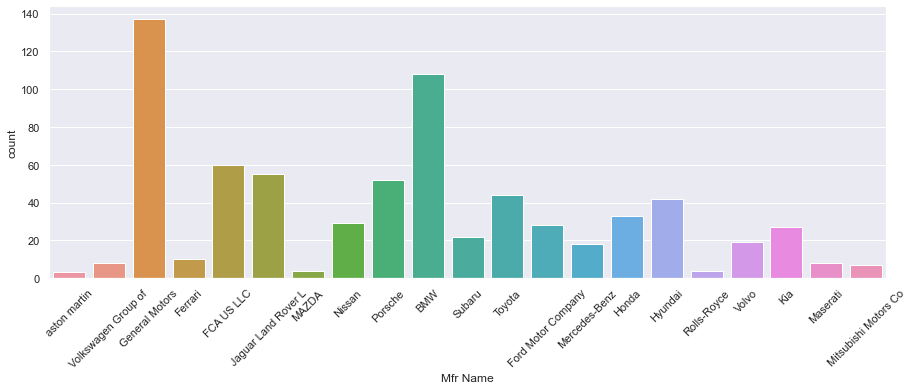

In [59]:
ax=sns.countplot(x='Mfr Name', data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

Finally, let's look at a heat-map in Seaborn. A heat map allows you to plot tabular, 2D data of some sort, with colors representing the individual values in each cell of the 2D table.

In this example, we'll create a pivot table from our original dataframe, to create a 2D table that contains the average MPG ratings for every combination of number of cylinders and engine displacement.

The resulting heatmap shows all of the engine displacement values along the X axis, and all of the cylinder values along the Y axis. For each cell of the table, the actual average MPG rating for that combination of cylinders and engine displacement is represented not as a number, but as a color that ranges from dark for small values, and light for larger values.

And, this does allow you visualize a clear trend where things get progressively darker as we move from the top-left of the graph to the bottom-right. Which makes sense; higher MPG ratings are associated with lower numbers of cylinders, and lower engine displacment values. By the time we get to an 8-liter 16-cylinder engine, the average MPG is at its worst of about 12, represented by the color black.

This particular graph has a lot of missing data, but the heatmap deals with that gracefully. A 3-cylinder 8-liter engine simply does not exist!

<AxesSubplot:xlabel='Eng Displ', ylabel='Cylinders'>

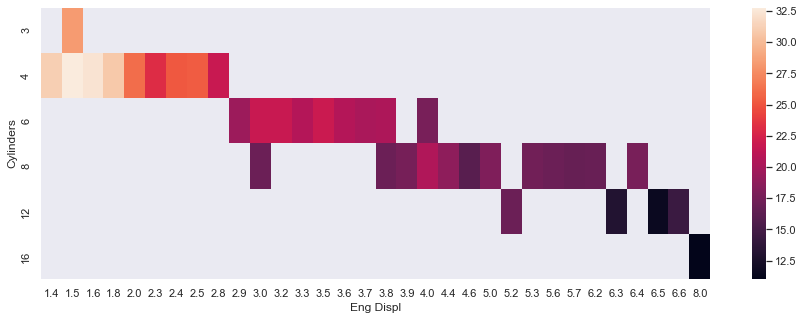

In [60]:
df2 = df.pivot_table(index='Cylinders', columns='Eng Displ', values='CombMPG', aggfunc='mean')
sns.heatmap(df2)

## Exercise

Explore the relationship between the number of gears a car has, and its combined MPG rating. Visualize these two dimensions using a scatter plot, lmplot, jointplot, boxplot, and swarmplot. What conclusions can you draw?

My solution is below - no peeking ahead of time!
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>



<AxesSubplot:xlabel='# Gears', ylabel='CombMPG'>

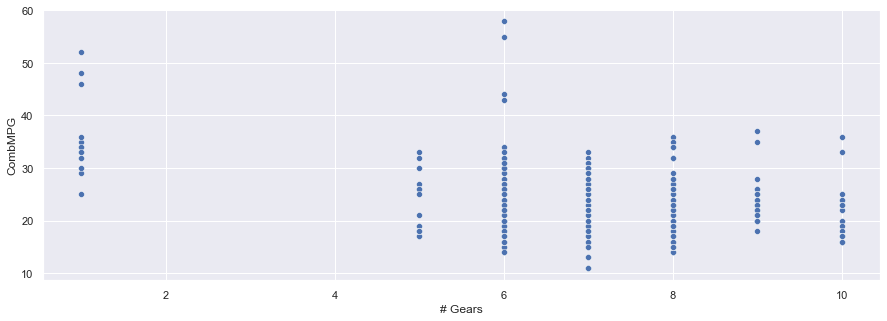

In [61]:
sns.scatterplot(x='# Gears', y="CombMPG", data=df)

A scatterplot arranges itself into columns when you have ordinal data like the number of gears, but it tells us that there's a pretty wide range of MPG values for each type of gear box, although if you look at where the data points are clustered, you can sort of see a downward trend in MPG as the number of gears increases. But it's subtle.

We also see that there's such a thing as a single gear car. These are "continuously variable transmission" cars, and we can see they typically have high MPG ratings and are therefore quite efficient.

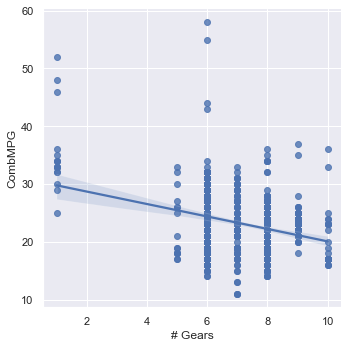

In [62]:
sns.lmplot(x='# Gears', y="CombMPG", data=df)

The "lmplot" gives us a linear regression of our data overlaid on the graph, and this makes the overall trend of lower MPG's with more gears apparent. More gears isn't better when it comes to efficiency, it seems. We also see the error bars on that regression line, which tells us this trend is probably real and not just the result of randomness in the samples.

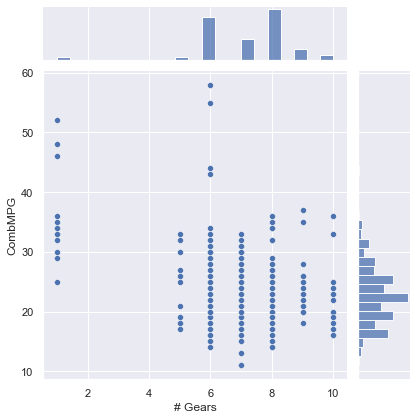

In [63]:
sns.jointplot(x='# Gears', y="CombMPG", data=df)

The jointplot gives us histograms on each axis, which provides some interesting insights. The most common gear configuration seems to be 8, with 6 closely behind. And MPG ratings seem to roughly follow a bell curve centered at around 22 or so.

<AxesSubplot:xlabel='# Gears', ylabel='CombMPG'>

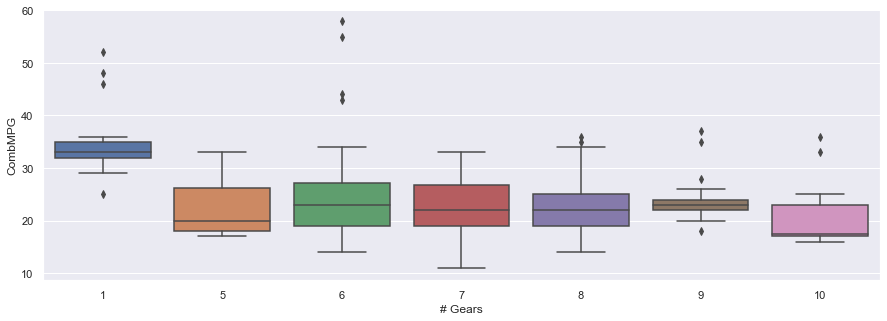

In [64]:
sns.boxplot(x='# Gears', y="CombMPG", data=df)

The box plot shows us that the range of MPG values we see on each gearbox type aren't as crazily distributed as it seemed at first glance; many of the extreme values are in fact outliers that are best discarded when analyzing the trends. This makes the real relationships easier to see; those continuously variable transmissions with a single gear are really quite good at fuel efficiency (higher MPG's are more efficient). Between 5 and 8 things are roughly the same, but from 8-10 things decline markedly.

C:\Users\jhaas\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='# Gears', ylabel='CombMPG'>

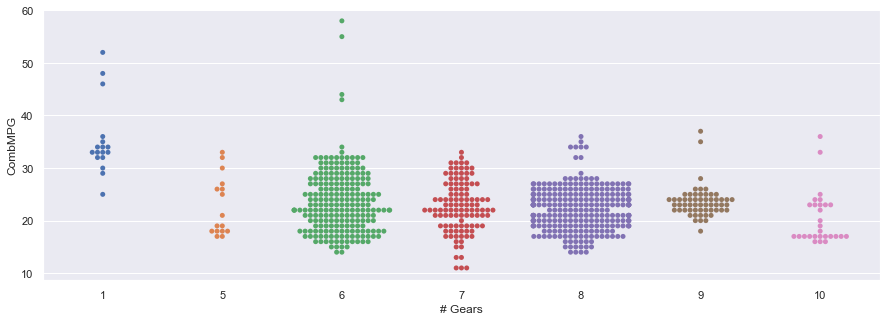

In [65]:
sns.swarmplot(x='# Gears', y="CombMPG", data=df)

The swarm plot makes it even more apparent that those high MPG outliers are in fact outliers on the 6-gear vehicles; the vast majority of 6-gear vehcles have less than 32 MPG. And the overall trend is perhaps easiest to visualize and understand in this representation.

So, our final verdict: more gears result in worse fuel efficiency. Which strikes me as a little counter-intuitive! But, this is real data from the US Department of Energy for 2019 model year cars, and that's a real conclusion we've drawn, thanks to Seaborn!